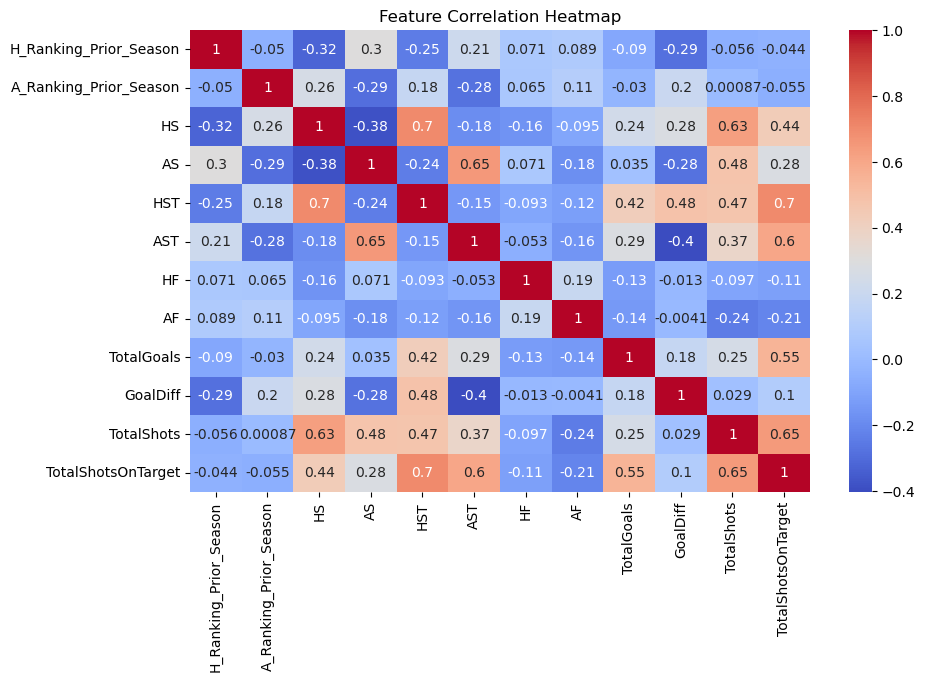

Logistic Regression Accuracy: 0.9974
Random Forest Accuracy: 1.0000


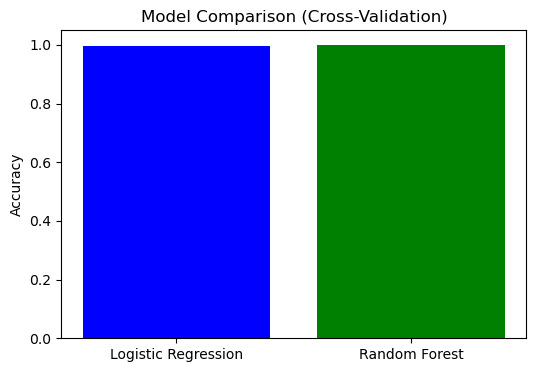


Final Model Evaluation:
Accuracy: 1.0
F1 Score: 1.0

Classification Report:
              precision    recall  f1-score   support

           A       1.00      1.00      1.00        22
           D       1.00      1.00      1.00        19
           H       1.00      1.00      1.00        35

    accuracy                           1.00        76
   macro avg       1.00      1.00      1.00        76
weighted avg       1.00      1.00      1.00        76



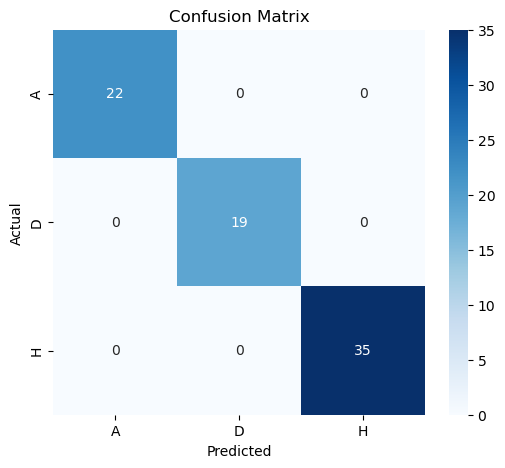

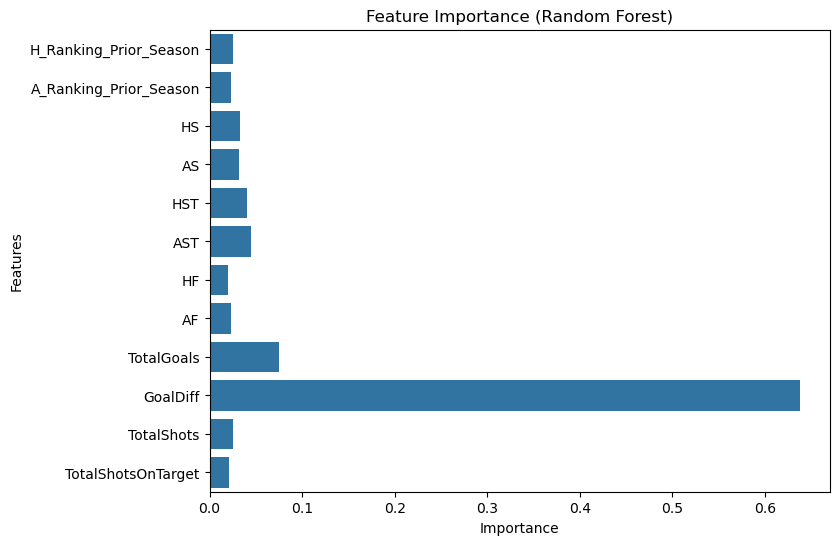

In [3]:
# -------------------------------
# Football Match Prediction with Cross Validation, Feature Engineering & Visualizations
# -------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

# 1. Load Data
df = pd.read_csv("2022-23data.csv")

# 2. Basic Cleaning
df = df.dropna(subset=['FTR'])  # Remove rows with missing target

# 3. Feature Engineering
df['TotalGoals'] = df['FTHG'] + df['FTAG']  # Total goals
df['GoalDiff'] = df['FTHG'] - df['FTAG']  # Goal difference
df['TotalShots'] = df['HS'] + df['AS']
df['TotalShotsOnTarget'] = df['HST'] + df['AST']

# Select features for model
feature_cols = ['H_Ranking_Prior_Season', 'A_Ranking_Prior_Season', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'TotalGoals', 'GoalDiff', 'TotalShots', 'TotalShotsOnTarget']
X = df[feature_cols].copy()
y = df['FTR']  # Full-Time Result (H/D/A)

# Encode target (H/D/A)
y_encoder = LabelEncoder()
y = y_encoder.fit_transform(y)  # H=0, D=1, A=2

# 4. Handle missing values
X = X.fillna(0)

# 5. Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6. Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[feature_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# 7. Split Data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 8. Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# 9. Cross-Validation Accuracy
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_scaled, y, cv=kf, scoring='accuracy')
    cv_results[name] = scores.mean()
    print(f"{name} Accuracy: {scores.mean():.4f}")

# Plot Cross-Validation Results
plt.figure(figsize=(6, 4))
plt.bar(cv_results.keys(), cv_results.values(), color=['blue', 'green'])
plt.ylabel('Accuracy')
plt.title('Model Comparison (Cross-Validation)')
plt.show()

# 10. Train Final Model (Random Forest example)
final_model = RandomForestClassifier(n_estimators=100, random_state=42)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

# 11. Evaluation
print("\nFinal Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=y_encoder.classes_))

# Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=y_encoder.classes_, yticklabels=y_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 12. Feature Importance (Random Forest)
importances = final_model.feature_importances_
plt.figure(figsize=(8, 6))
sns.barplot(x=importances, y=feature_cols)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()


Shape: (380, 108)
Columns: ['Div', 'Date', 'Time', 'HomeTeam', 'AwayTeam', 'H_Ranking_Prior_Season', 'A_Ranking_Prior_Season', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'VCH', 'VCD', 'VCA', 'MaxH', 'MaxD', 'MaxA', 'AvgH', 'AvgD', 'AvgA', 'B365>2.5', 'B365<2.5', 'P>2.5', 'P<2.5', 'Max>2.5', 'Max<2.5', 'Avg>2.5', 'Avg<2.5', 'AHh', 'B365AHH', 'B365AHA', 'PAHH', 'PAHA', 'MaxAHH', 'MaxAHA', 'AvgAHH', 'AvgAHA', 'B365CH', 'B365CD', 'B365CA', 'BWCH', 'BWCD', 'BWCA', 'IWCH', 'IWCD', 'IWCA', 'PSCH', 'PSCD', 'PSCA', 'WHCH', 'WHCD', 'WHCA', 'VCCH', 'VCCD', 'VCCA', 'MaxCH', 'MaxCD', 'MaxCA', 'AvgCH', 'AvgCD', 'AvgCA', 'B365C>2.5', 'B365C<2.5', 'PC>2.5', 'PC<2.5', 'MaxC>2.5', 'MaxC<2.5', 'AvgC>2.5', 'AvgC<2.5', 'AHCh', 'B365CAHH', 'B365CAHA', 'PCAHH', 'PCAHA', 'MaxCAHH', 'MaxCAHA', 'AvgCAHH', 'AvgCAHA']

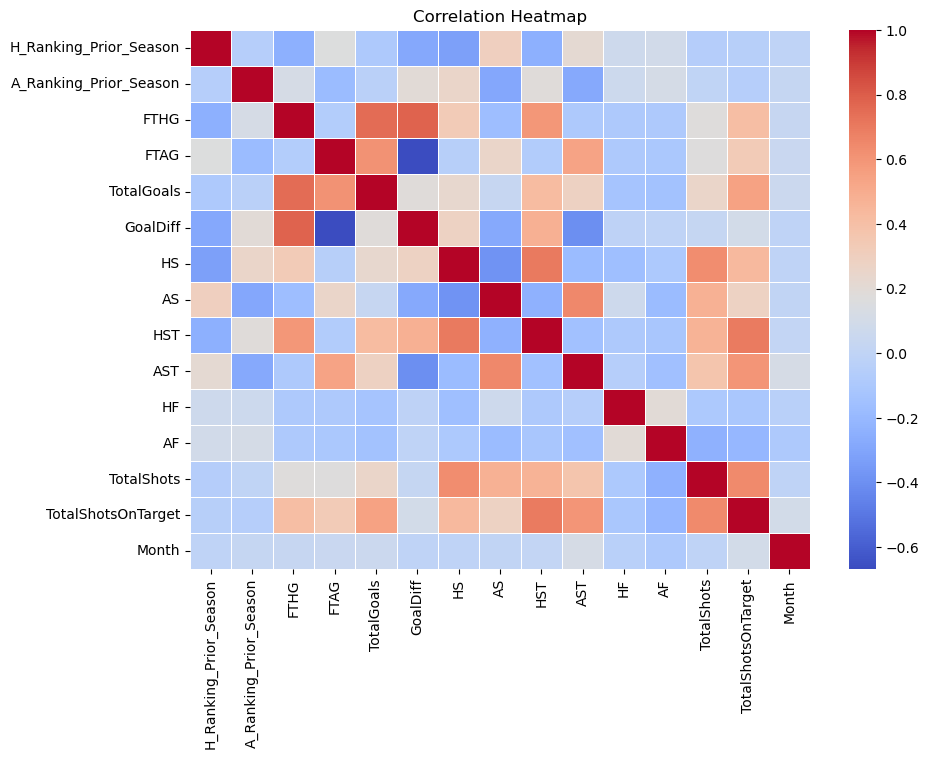

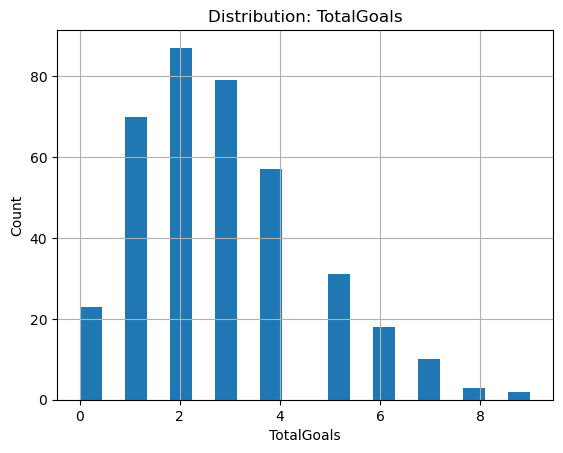

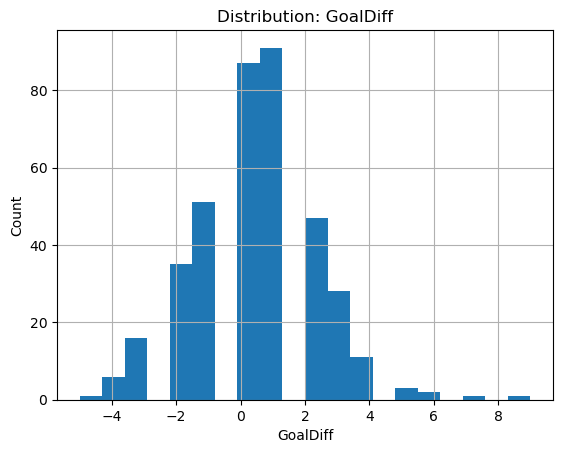

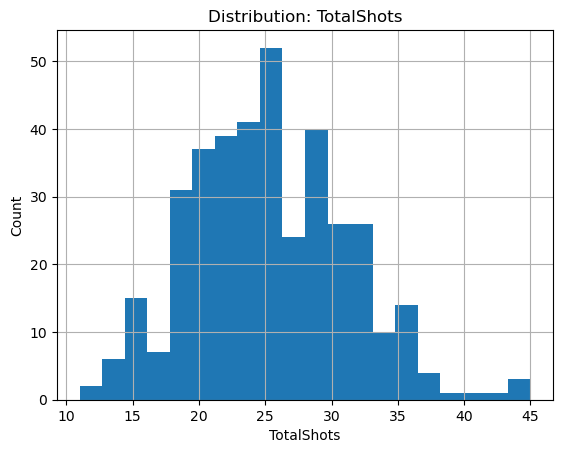

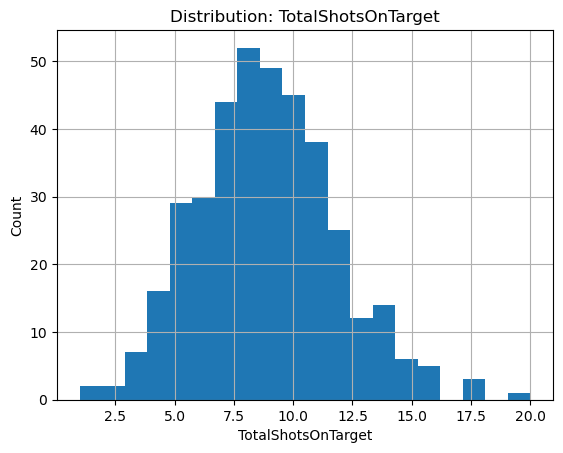

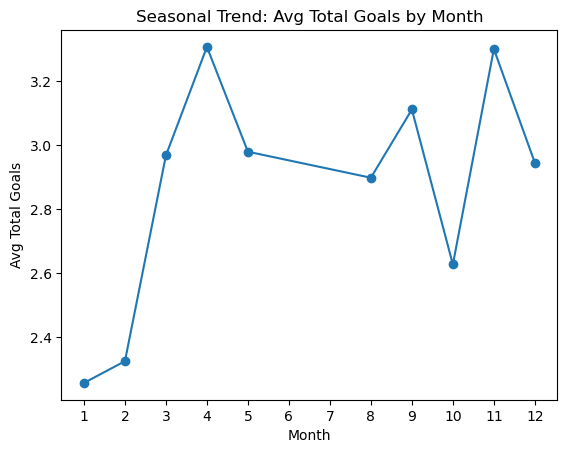

[CV] LogReg -> Acc: 0.9974 | F1(w): 0.9974
[CV] RF -> Acc: 1.0000 | F1(w): 1.0000
[CV] GB -> Acc: 1.0000 | F1(w): 1.0000


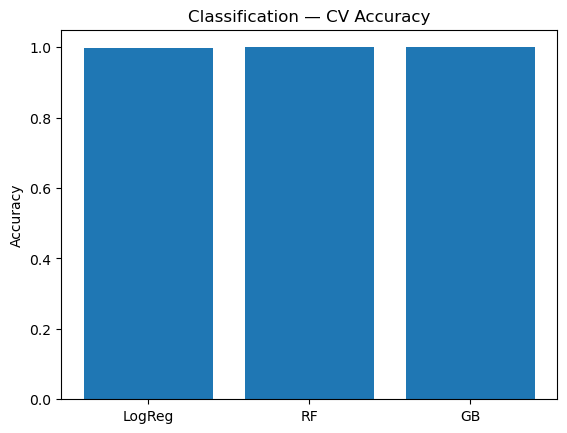

[CV] LinReg -> RMSE: 0.0000 | R²: 1.0000
[CV] PolyReg -> RMSE: 0.0000 | R²: 1.0000
[CV] SVR -> RMSE: 0.5131 | R²: 0.9131
[CV] RF -> RMSE: 0.0648 | R²: 0.9976
[CV] GB -> RMSE: 0.0702 | R²: 0.9974


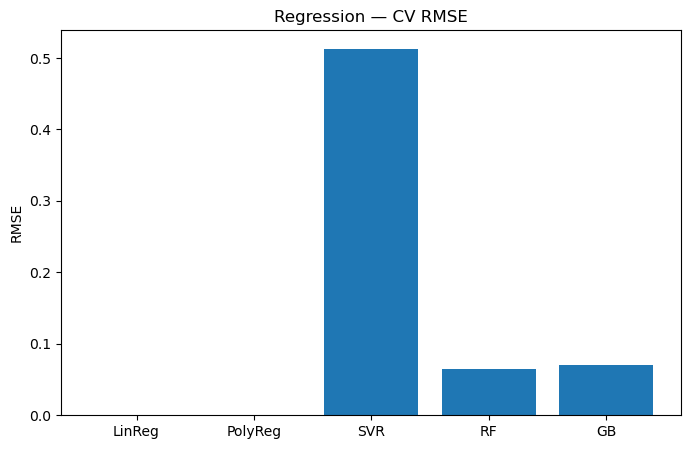

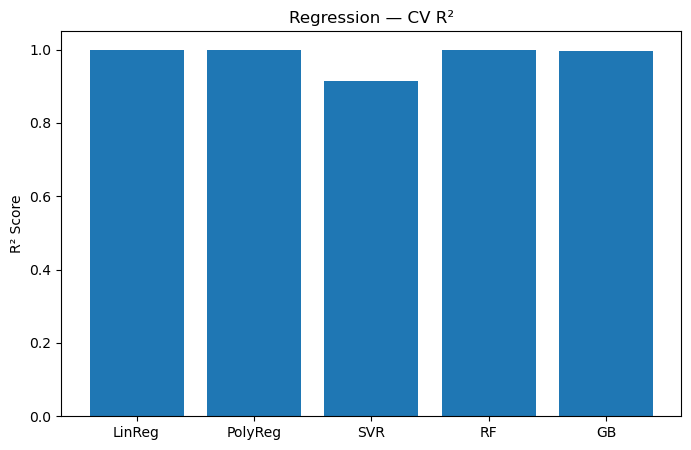


=== Regression: Final Model (LinReg) ===
MAE: 1.2942863155498535e-15
RMSE: 1.615505517495783e-15
R²: 1.0


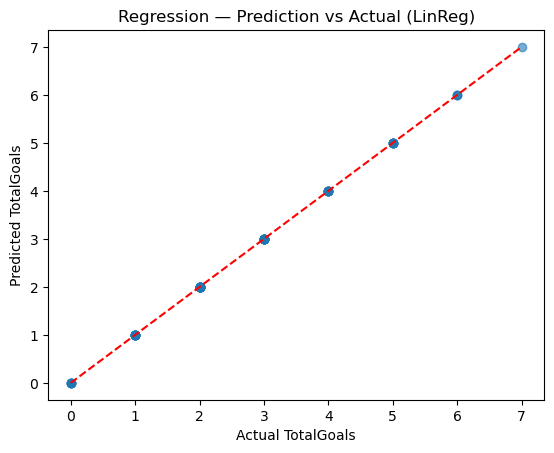


=== Regression: Final Model (PolyReg) ===
MAE: 2.690830014946761e-15
RMSE: 3.5721079055383076e-15
R²: 1.0


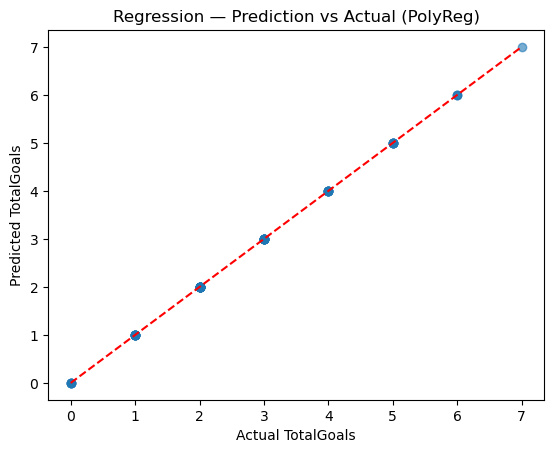


=== Regression: Final Model (SVR) ===
MAE: 0.23701378359492795
RMSE: 0.3364746178027553
R²: 0.9568504907406303


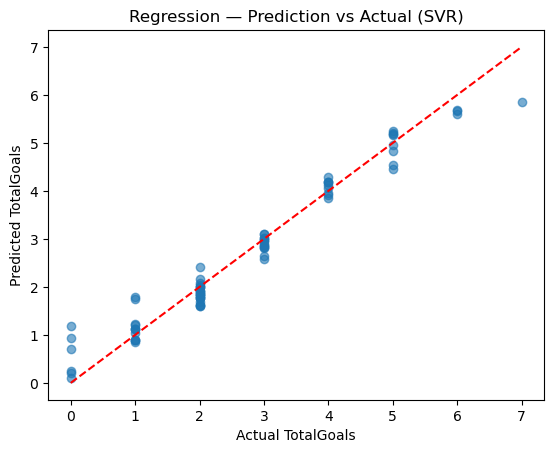


=== Regression: Final Model (RF) ===
MAE: 0.0006140350877193008
RMSE: 0.0029119636267890938
R²: 0.9999967682099784


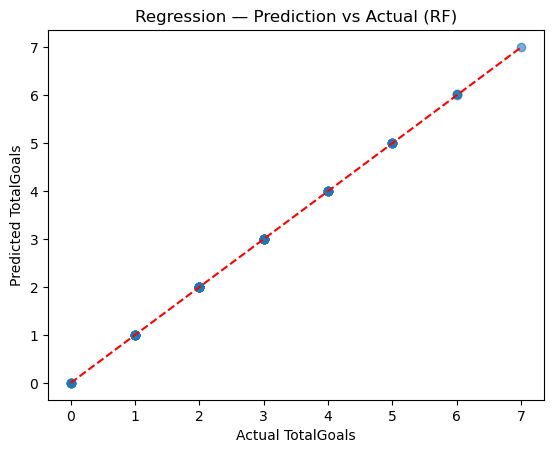


=== Regression: Final Model (GB) ===
MAE: 3.834426395806399e-05
RMSE: 4.906219075213054e-05
R²: 0.9999999990825865


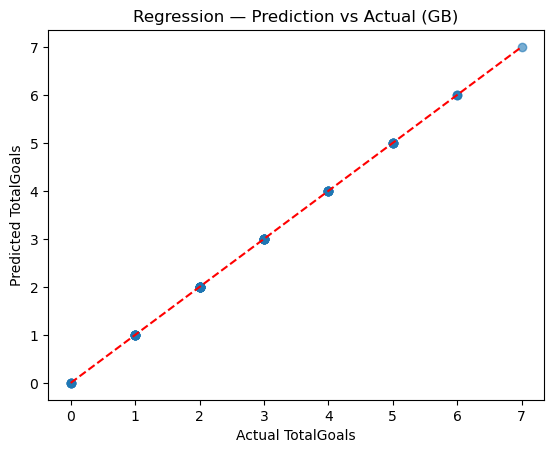

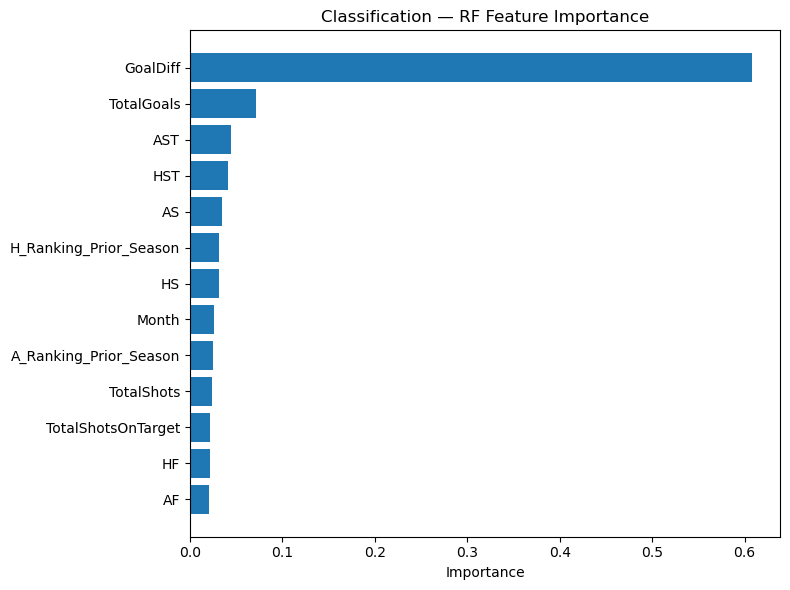

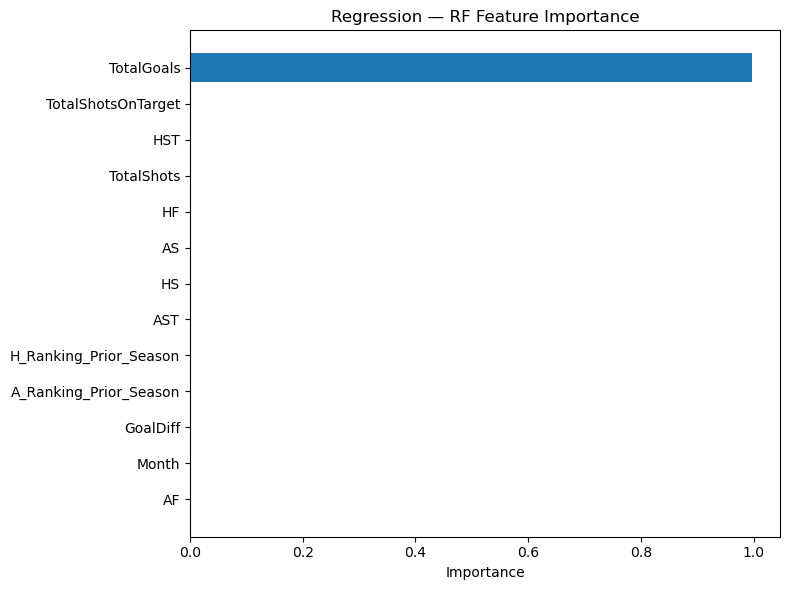

In [7]:
# ============================================================
# ReflexionPro — Football Data Analysis (2022-23data.csv)
# EDA, Feature Engineering, Cross-Validation, Classification & Regression
# ============================================================

# 0) Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (
    accuracy_score, f1_score, classification_report, confusion_matrix,
    mean_absolute_error, mean_squared_error, r2_score
)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Classification models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Regression models
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# -----------------------------
# 1) Load & Basic Inspection
# -----------------------------
csv_path = "2022-23data.csv"  # adjust if needed
assert Path(csv_path).exists(), f"File not found: {csv_path}"

df = pd.read_csv(csv_path)
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print(df.head(3))

# -----------------------------
# 2) Clean & Parse Types
# -----------------------------
# Parse Date if present
if "Date" in df.columns:
    df["Date"] = pd.to_datetime(df["Date"], errors="coerce", dayfirst=True)

# Remove rows without target for classification
if "FTR" in df.columns:
    df = df.dropna(subset=["FTR"])

# Basic NA handling on key numeric columns
numeric_candidates = [
    "H_Ranking_Prior_Season","A_Ranking_Prior_Season",
    "FTHG","FTAG","HS","AS","HST","AST","HF","AF"
]
present_numeric = [c for c in numeric_candidates if c in df.columns]
df[present_numeric] = df[present_numeric].fillna(0)

# -----------------------------
# 3) Feature Engineering
# -----------------------------
# Goals-based features
if set(["FTHG","FTAG"]).issubset(df.columns):
    df["TotalGoals"] = df["FTHG"] + df["FTAG"]
    df["GoalDiff"]   = df["FTHG"] - df["FTAG"]
else:
    df["TotalGoals"] = np.nan
    df["GoalDiff"]   = np.nan

# Shot-based features
if set(["HS","AS"]).issubset(df.columns):
    df["TotalShots"] = df["HS"] + df["AS"]
else:
    df["TotalShots"] = np.nan

if set(["HST","AST"]).issubset(df.columns):
    df["TotalShotsOnTarget"] = df["HST"] + df["AST"]
else:
    df["TotalShotsOnTarget"] = np.nan

# Seasonality (month)
if "Date" in df.columns:
    df["Month"] = df["Date"].dt.month
else:
    df["Month"] = np.nan

# Encode target for classification
y_encoder = LabelEncoder()
y_class = y_encoder.fit_transform(df["FTR"]) if "FTR" in df.columns else None
print("Target classes (FTR):", list(y_encoder.classes_) if y_class is not None else "N/A")

# -----------------------------
# 4) EDA
# -----------------------------
print("\n=== Descriptive Statistics ===")
print(df[[c for c in present_numeric if c in df.columns]].describe())

# Correlation Heatmap
corr_feats = [c for c in [
    "H_Ranking_Prior_Season","A_Ranking_Prior_Season",
    "FTHG","FTAG","TotalGoals","GoalDiff",
    "HS","AS","HST","AST","HF","AF",
    "TotalShots","TotalShotsOnTarget","Month"
] if c in df.columns]

if len(corr_feats) >= 2:
    plt.figure(figsize=(10,7))
    sns.heatmap(df[corr_feats].corr(numeric_only=True), annot=False, cmap="coolwarm", linewidths=.5)
    plt.title("Correlation Heatmap")
    plt.show()

# Distributions for engineered features
for col in ["TotalGoals","GoalDiff","TotalShots","TotalShotsOnTarget"]:
    if col in df.columns and df[col].notna().any():
        plt.figure()
        df[col].hist(bins=20)
        plt.title(f"Distribution: {col}")
        plt.xlabel(col); plt.ylabel("Count")
        plt.show()

# Seasonal trend: Avg Total Goals by Month
if "Month" in df.columns and "TotalGoals" in df.columns:
    seasonal = df.groupby("Month", dropna=True)["TotalGoals"].mean().reset_index()
    if len(seasonal) > 0:
        plt.figure()
        plt.plot(seasonal["Month"], seasonal["TotalGoals"], marker="o")
        plt.xticks(range(1,13))
        plt.title("Seasonal Trend: Avg Total Goals by Month")
        plt.xlabel("Month"); plt.ylabel("Avg Total Goals")
        plt.show()

# -----------------------------
# 5) Feature Sets
# -----------------------------
base_numeric = [c for c in [
    "H_Ranking_Prior_Season","A_Ranking_Prior_Season",
    "HS","AS","HST","AST","HF","AF",
    "TotalGoals","GoalDiff","TotalShots","TotalShotsOnTarget","Month"
] if c in df.columns]

X_class = df[base_numeric].copy().fillna(0)

# Regression target
y_reg = df["TotalGoals"].values if "TotalGoals" in df.columns else None

# -----------------------------
# 6) Train/Test Split
# -----------------------------
# Classification split
if y_class is not None:
    Xc_train, Xc_test, yc_train, yc_test = train_test_split(
        X_class, y_class, test_size=0.2, random_state=42, stratify=y_class
    )

# Regression split
if y_reg is not None:
    valid_mask = ~np.isnan(y_reg)
    X_reg_all = X_class.loc[valid_mask].copy()
    y_reg_all = y_reg[valid_mask]
    Xr_train, Xr_test, yr_train, yr_test = train_test_split(
        X_reg_all, y_reg_all, test_size=0.2, random_state=42
    )


# -----------------------------
# 7) Pipelines & Models (Updated for Regression)
# -----------------------------
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline as skl_make_pipeline

numeric_transformer = Pipeline(steps=[("scaler", StandardScaler())])

clf_models = {
    "LogReg": LogisticRegression(max_iter=2000),
    "RF": RandomForestClassifier(n_estimators=300, random_state=42),
    "GB": GradientBoostingClassifier(random_state=42)
}

# Regression models (added Polynomial)
reg_models = {
    "LinReg": LinearRegression(),
    "PolyReg": skl_make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),
    "SVR": SVR(kernel="rbf", C=2.0, epsilon=0.2),
    "RF": RandomForestRegressor(n_estimators=300, random_state=42),
    "GB": GradientBoostingRegressor(random_state=42)
}

def make_pipe(est):
    return Pipeline(steps=[("scale", numeric_transformer), ("model", est)])

# -----------------------------
# 8) Cross-Validation (Updated Regression Section)
# -----------------------------
kf = KFold(n_splits=5, shuffle=True, random_state=42)

clf_cv_scores = {}
if y_class is not None:
    for name, est in clf_models.items():
        pipe = make_pipe(est)
        acc = cross_val_score(pipe, X_class, y_class, cv=kf, scoring="accuracy")
        f1w = cross_val_score(pipe, X_class, y_class, cv=kf, scoring="f1_weighted")
        clf_cv_scores[name] = {"accuracy_mean": acc.mean(), "f1_weighted_mean": f1w.mean()}
        print(f"[CV] {name} -> Acc: {acc.mean():.4f} | F1(w): {f1w.mean():.4f}")

    plt.figure()
    plt.bar(clf_cv_scores.keys(), [v["accuracy_mean"] for v in clf_cv_scores.values()])
    plt.title("Classification — CV Accuracy")
    plt.ylabel("Accuracy")
    plt.show()

# --- Regression CV ---
reg_cv_scores = {}
if "TotalGoals" in df.columns:
    for name, est in reg_models.items():
        pipe = make_pipe(est)
        rmse = -cross_val_score(pipe, X_reg_all, y_reg_all, cv=kf, scoring="neg_root_mean_squared_error")
        r2   = cross_val_score(pipe, X_reg_all, y_reg_all, cv=kf, scoring="r2")
        reg_cv_scores[name] = {"rmse_mean": rmse.mean(), "r2_mean": r2.mean()}
        print(f"[CV] {name} -> RMSE: {rmse.mean():.4f} | R²: {r2.mean():.4f}")

    # Bar plots for CV results
    plt.figure(figsize=(8,5))
    plt.bar(reg_cv_scores.keys(), [v["rmse_mean"] for v in reg_cv_scores.values()])
    plt.title("Regression — CV RMSE")
    plt.ylabel("RMSE")
    plt.show()

    plt.figure(figsize=(8,5))
    plt.bar(reg_cv_scores.keys(), [v["r2_mean"] for v in reg_cv_scores.values()])
    plt.title("Regression — CV R²")
    plt.ylabel("R² Score")
    plt.show()

# -----------------------------
# 9) Final Fits & Evaluation for Regression
# -----------------------------
if "TotalGoals" in df.columns:
    for name, est in reg_models.items():
        reg_final = make_pipe(est)
        reg_final.fit(Xr_train, yr_train)
        yr_pred = reg_final.predict(Xr_test)

        print(f"\n=== Regression: Final Model ({name}) ===")
        print("MAE:", mean_absolute_error(yr_test, yr_pred))
        print("RMSE:", np.sqrt(mean_squared_error(yr_test, yr_pred)))
        print("R²:", r2_score(yr_test, yr_pred))

        # Prediction vs Actual scatter plot
        plt.figure()
        plt.scatter(yr_test, yr_pred, alpha=0.6)
        mn, mx = min(yr_test.min(), yr_pred.min()), max(yr_test.max(), yr_pred.max())
        plt.plot([mn, mx], [mn, mx], "r--")
        plt.xlabel("Actual TotalGoals"); plt.ylabel("Predicted TotalGoals")
        plt.title(f"Regression — Prediction vs Actual ({name})")
        plt.show()

# -----------------------------
# 10) Feature Importance (RF only, unchanged)
# -----------------------------
def plot_feature_importance_trained_tree(model, feature_names, title):
    if hasattr(model, "named_steps") and "model" in model.named_steps:
        inner = model.named_steps["model"]
    else:
        inner = model
    if hasattr(inner, "feature_importances_"):
        importances = inner.feature_importances_
        order = np.argsort(importances)[::-1]
        plt.figure(figsize=(8,6))
        plt.barh(np.array(feature_names)[order][::-1], importances[order][::-1])
        plt.title(title)
        plt.xlabel("Importance")
        plt.tight_layout()
        plt.show()

if y_class is not None and "RF" in clf_models:
    rf_clf = make_pipe(RandomForestClassifier(n_estimators=300, random_state=42))
    rf_clf.fit(Xc_train, yc_train)
    plot_feature_importance_trained_tree(rf_clf, X_class.columns, "Classification — RF Feature Importance")

if "TotalGoals" in df.columns and "RF" in reg_models:
    rf_reg = make_pipe(RandomForestRegressor(n_estimators=300, random_state=42))
    rf_reg.fit(Xr_train, yr_train)
    plot_feature_importance_trained_tree(rf_reg, X_class.columns, "Regression — RF Feature Importance")

